#Self Organizing Map

##Install MiniSom Package

In [1]:
pip install MiniSom

### Importing the libraries


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing the dataset

In [38]:
dataset = pd.read_csv(r"C:\Users\Hamed\Machine Learning\Deep Learning A-Z™ Download Practice Datasets\Self_Organizing_Maps\Credit_Card_Applications.csv")
dataset.head(1)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0


In [39]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
sc = MinMaxScaler(feature_range=(0, 1))

In [42]:
X = sc.fit_transform(X)

## Feature Scaling


##Training the SOM


In [43]:
from minisom import MiniSom

In [44]:
som = MiniSom(  x = 10,y = 10,input_len = 15,sigma=1.0,learning_rate=0.5)

In [45]:
som.random_weights_init(X)

In [46]:
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


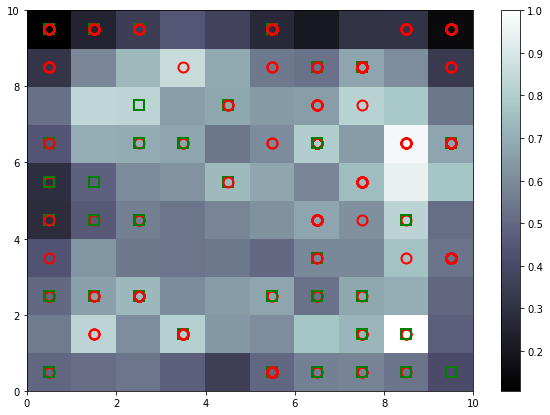

In [47]:
from pylab import bone, pcolor, colorbar, plot, show
plt.figure(figsize= (10,7))
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


##Printing the Fraunch Clients

In [49]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(8,6)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [53]:
print('Fraud Customer IDs :')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs :
15631685
15753591
15766183
15682540
15797246
15614813
15772329
15734649
15571081
15778142
15646082
15717629
15635598
15647191
15812918
15715519
15630592
15589541
15757306
15598574
15711759
15808223
15768295
15753550
15724851
15702149
15759133
15758477
15673238
